# South Korea Covid Analysis with route dataset.

> Dataset yang digunakan adalah rute transportasi dan shape dari negara korea selatan. Analisa ini bertujuan untuk mengetahui provinsi mana yang banyak kegiatan perjalanan ketika sedang pandemi Covid 19

## Acquisition

Mengimport Library

In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt

Json Data

In [2]:
mapkorea = gpd.read_file('DatamapKorea.json')
pd.set_option('display.max_columns', None)

In [3]:
mapkorea

,scalerank,featurecla,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,geou_dif,geounit,gu_a3,su_dif,subunit,su_a3,brk_diff,name,name_long,brk_a3,brk_name,brk_group,abbrev,postal,formal_en,formal_fr,note_adm0,note_brk,name_sort,name_alt,mapcolor7,mapcolor8,mapcolor9,mapcolor13,pop_est,gdp_md_est,pop_year,lastcensus,gdp_year,economy,income_grp,wikipedia,fips_10,iso_a2,iso_a3,iso_n3,un_a3,wb_a2,wb_a3,woe_id,adm0_a3_is,adm0_a3_us,adm0_a3_un,adm0_a3_wb,continent,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,filename,geometry
0,1,Admin-0 country,2,South Korea,KOR,0,2,Sovereign country,South Korea,KOR,0,South Korea,KOR,0,South Korea,KOR,0,Korea,Republic of Korea,KOR,Republic of Korea,None,S.K.,KR,Republic of Korea,None,None,None,"Korea, Rep.",None,4,1,1,5,48508972,1335000,-99,2010,-99,4. Emerging region: MIKT,1. High income: OECD,-99,None,KR,KOR,410,410,KR,KOR,-99,KOR,KOR,-99,-99,Asia,Asia,Eastern Asia,East Asia & Pacific,5,17,4,-99,1,KOR.geojson,"POLYGON ((128.34972 38.61224, 129.21292 37.432..."


In [4]:
type(mapkorea)

geopandas.geodataframe.GeoDataFrame

In [5]:
type(mapkorea.geometry)

geopandas.geoseries.GeoSeries

In [6]:
mapkorea.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 65 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   scalerank   1 non-null      int64   
 1   featurecla  1 non-null      object  
 2   labelrank   1 non-null      int64   
 3   sovereignt  1 non-null      object  
 4   sov_a3      1 non-null      object  
 5   adm0_dif    1 non-null      int64   
 6   level       1 non-null      int64   
 7   type        1 non-null      object  
 8   admin       1 non-null      object  
 9   adm0_a3     1 non-null      object  
 10  geou_dif    1 non-null      int64   
 11  geounit     1 non-null      object  
 12  gu_a3       1 non-null      object  
 13  su_dif      1 non-null      int64   
 14  subunit     1 non-null      object  
 15  su_a3       1 non-null      object  
 16  brk_diff    1 non-null      int64   
 17  name        1 non-null      object  
 18  name_long   1 non-null      object  
 19  brk_

CSV Data

In [7]:
# Import csv
korea = pd.read_csv('DataRoute.csv')
korea.head()

,id,date,province,city,visit,latitude,longitude
0,1,2020-01-19,Incheon,Jung-gu,airport,37.460459,126.440680
1,1,2020-01-20,Incheon,Seo-gu,hospital_isolated,37.478832,126.668558
2,2,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.562143,126.801884
3,2,2020-01-23,Seoul,Jung-gu,hospital_isolated,37.567454,127.005627
4,3,2020-01-20,Incheon,Jung-gu,airport,37.460459,126.440680


In [8]:
korea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         68 non-null     int64  
 1   date       68 non-null     object 
 2   province   68 non-null     object 
 3   city       68 non-null     object 
 4   visit      68 non-null     object 
 5   latitude   68 non-null     float64
 6   longitude  68 non-null     float64
dtypes: float64(2), int64(1), object(4)
memory usage: 3.8+ KB


In [9]:
korea.describe

<bound method NDFrame.describe of     id        date     province         city              visit   latitude  \
0    1  2020-01-19      Incheon      Jung-gu            airport  37.460459   
1    1  2020-01-20      Incheon       Seo-gu  hospital_isolated  37.478832   
2    2  2020-01-22  Gyeonggi-do     Gimpo-si            airport  37.562143   
3    2  2020-01-23        Seoul      Jung-gu  hospital_isolated  37.567454   
4    3  2020-01-20      Incheon      Jung-gu            airport  37.460459   
..  ..         ...          ...          ...                ...        ...   
63  14  2020-01-30  Gyeonggi-do   Bucheon-si             market  37.484044   
64  14  2020-02-02  Gyeonggi-do  Seongnam-si  hospital_isolated  37.347722   
65  15  2020-01-20      Incheon      Jung-gu            airport  37.460459   
66  15  2020-02-01  Gyeonggi-do     Suwon-si           hospital  37.304558   
67  15  2020-02-02  Gyeonggi-do  Seongnam-si  hospital_isolated  37.390524   

     longitude  
0   126.4406

## Preprocessing

Menambahkan fitur baru dari hasil penggabungan 2 fitur (longitude dan latitude)

In [10]:
korea['coordinates'] = korea[['longitude', 'latitude']].values.tolist()

In [11]:
korea

,id,date,province,city,visit,latitude,longitude,coordinates
0,1,2020-01-19,Incheon,Jung-gu,airport,37.460459,126.440680,"[126.44068, 37.460459]"
1,1,2020-01-20,Incheon,Seo-gu,hospital_isolated,37.478832,126.668558,"[126.668558, 37.478832]"
2,2,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.562143,126.801884,"[126.801884, 37.562143]"
3,2,2020-01-23,Seoul,Jung-gu,hospital_isolated,37.567454,127.005627,"[127.005627, 37.567454]"
4,3,2020-01-20,Incheon,Jung-gu,airport,37.460459,126.440680,"[126.44068, 37.460459]"
...,...,...,...,...,...,...,...,...
63,14,2020-01-30,Gyeonggi-do,Bucheon-si,market,37.484044,126.782436,"[126.782436, 37.484044]"
64,14,2020-02-02,Gyeonggi-do,Seongnam-si,hospital_isolated,37.347722,127.124322,"[127.124322, 37.347722]"
65,15,2020-01-20,Incheon,Jung-gu,airport,37.460459,126.440680,"[126.44068, 37.460459]"
66,15,2020-02-01,Gyeonggi-do,Suwon-si,hospital,37.304558,127.010198,"[127.010198, 37.304558]"


Merubah list menjadi point

In [12]:
korea['coordinates'] = korea['coordinates'].apply(Point)

Membuat variabel baru

In [13]:
geo_korea = gpd.GeoDataFrame(korea, geometry='coordinates')

In [14]:
geo_korea

,id,date,province,city,visit,latitude,longitude,coordinates
0,1,2020-01-19,Incheon,Jung-gu,airport,37.460459,126.440680,POINT (126.44068 37.46046)
1,1,2020-01-20,Incheon,Seo-gu,hospital_isolated,37.478832,126.668558,POINT (126.66856 37.47883)
2,2,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.562143,126.801884,POINT (126.80188 37.56214)
3,2,2020-01-23,Seoul,Jung-gu,hospital_isolated,37.567454,127.005627,POINT (127.00563 37.56745)
4,3,2020-01-20,Incheon,Jung-gu,airport,37.460459,126.440680,POINT (126.44068 37.46046)
...,...,...,...,...,...,...,...,...
63,14,2020-01-30,Gyeonggi-do,Bucheon-si,market,37.484044,126.782436,POINT (126.78244 37.48404)
64,14,2020-02-02,Gyeonggi-do,Seongnam-si,hospital_isolated,37.347722,127.124322,POINT (127.12432 37.34772)
65,15,2020-01-20,Incheon,Jung-gu,airport,37.460459,126.440680,POINT (126.44068 37.46046)
66,15,2020-02-01,Gyeonggi-do,Suwon-si,hospital,37.304558,127.010198,POINT (127.01020 37.30456)


## Visualization

<AxesSubplot:>

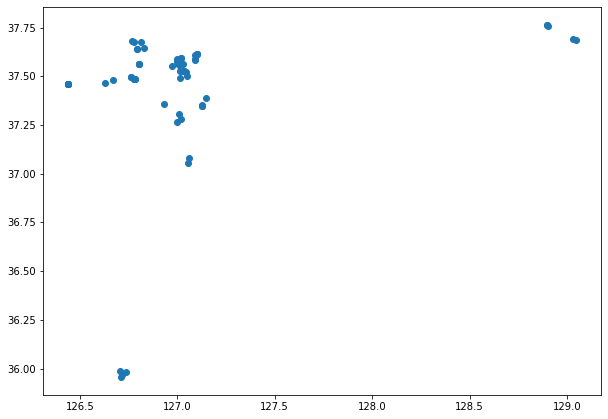

In [15]:
geo_korea.plot(figsize=(10,15))

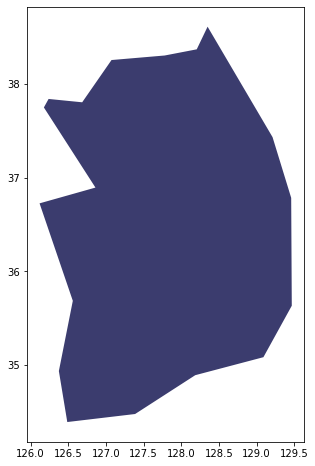

In [16]:
fig, ax = plt.subplots(1, figsize=(20,8))
base = mapkorea.plot(ax=ax, color='#3B3C6E')

Text(0.5, 1.0, 'Covid in Korea based on Province')

<Figure size 432x288 with 0 Axes>

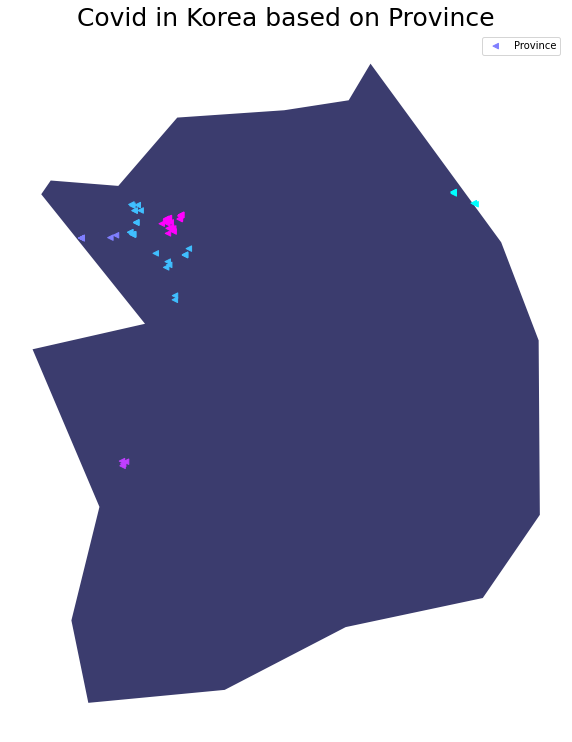

In [17]:
geo_korea.plot(ax=base, color='darkred', marker="*", markersize=30);

fig, ax = plt.subplots(1, figsize=(10,15))
base = mapkorea.plot(ax=ax, color='#3B3C6E')
geo_korea.plot(ax=base, column='province', marker="<", markersize=30, cmap='cool', label="Province")
_ = ax.axis('off')
plt.legend()
ax.set_title("Covid in Korea based on Province", fontsize=25)